# Options Trading IQ
## Everything You Need to Know About Iron Condors

[Iptions Trading IQ](https://optionstradingiq.com/iron-condors/)

In [2]:
# magic function to plot inline
%matplotlib inline

# python standard modules
import time
import datetime as dt
from math import sqrt, pi


# import numpy, pyplot and scipy
import numpy as np
import pandas as pd
# from openbb import obb
import matplotlib as mat

import matplotlib.pyplot as plt

# for plotting the vol surface
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy.stats import norm
from scipy.optimize import brentq
from scipy.interpolate import interp1d

plt.style.use('dark_background')

print(
    f"Numpy {np.__version__}\nMatplotlib {mat.__version__}\nScipy {scipy.__version__}\nPandas {pd.__version__}"
)

Numpy 1.26.4
Matplotlib 3.8.0
Scipy 1.13.1
Pandas 2.1.4


In [3]:
# 1 option contract is usually 100 shares
shares_per_contract = 100

# underlying stock price
S = 491

# strike price
lower_strike_put_K = 465
put_K = 470
call_K = 510
higher_strike_call_K = 515

# series of underlying stock prices to demonstrate a payoff profile
S_ = np.arange(lower_strike_put_K - (put_K - lower_strike_put_K)*2, higher_strike_call_K + (higher_strike_call_K - call_K) * 2, 0.01)

# time to expiration (you'll see this as T-t in the equation)
t = 30.0 / 365.0

# risk free rate (there's nuance to this which we'll describe later)
r = 0.02

# volatility (latent variable which is the topic of this talk)
vol = 0.25

# black scholes prices for demonstrating trades

lower_strike_put_premium = 1.74
put_premium = 2.14
call_premium = 1.51
higher_strike_call_premium = 0.82

In [4]:
print(lower_strike_put_K - (put_K - lower_strike_put_K)*2)
higher_strike_call_K + (higher_strike_call_K - call_K) * 2

455


525

In [5]:
# use a lambda for a payoff functions
# equivelant to:
#
# def call_payoff(S, K):
#     return np.maximum(S - K, 0.0)
call_payoff = lambda S, K: np.maximum(S_ - K, 0.0)
print(call_payoff)
# equivelant to:
#
# def put_payoff(S, K):
#     return np.maximum(K - S, 0.0)
put_payoff = lambda S, K: np.maximum(K - S_, 0.0)
print(put_payoff)

<function <lambda> at 0x7fbb458fbce0>
<function <lambda> at 0x7fbb425c8400>


## Bull Put Credit Spread

In [6]:
print("Bull Put Credit Spread")
print(f"Stock price ${S:.2f}")
print(f"Sold ${put_K:.2f} put for ${put_premium:.2f}")
print(f"Bought ${lower_strike_put_K:.2f} put for ${lower_strike_put_premium:.2f}")
net_put_premium_received = (put_premium - lower_strike_put_premium)*100
print(f"Net premium received is {net_put_premium_received:.2f}")
put_strike_range = put_K - lower_strike_put_K
# put_maximum_risk = (put_strike_range - (put_premium - lower_strike_put_premium)) * 100
put_maximum_risk = put_strike_range * 100 - net_put_premium_received
print(f"Maximum risk is ${put_maximum_risk:.2f}")
put_return_on_capital_at_risk = (net_put_premium_received / put_maximum_risk)*100
print(f"Maximum return on capital is {net_put_premium_received:.2f} for a return of {put_return_on_capital_at_risk:.0f}%")

Bull Put Credit Spread
Stock price $491.00
Sold $470.00 put for $2.14
Bought $465.00 put for $1.74
Net premium received is 40.00
Maximum risk is $460.00
Maximum return on capital is 40.00 for a return of 9%


In [7]:
print(S_)
print(put_K)

[455.   455.01 455.02 ... 524.97 524.98 524.99]
470


In [9]:
put_payoff(S_, put_K)

array([15.  , 14.99, 14.98, ...,  0.  ,  0.  ,  0.  ])

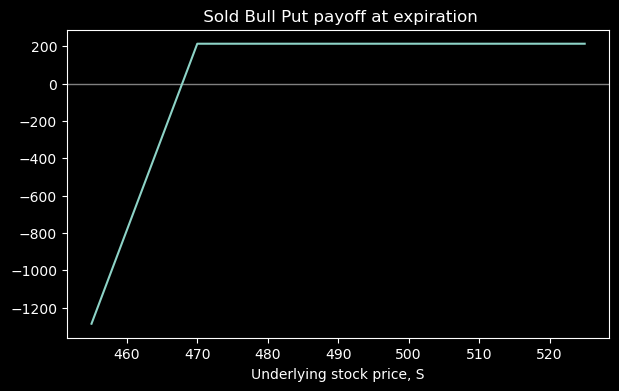

In [10]:
# plot a bull put credit spread
sold_put_payoff = -put_payoff(S_, put_K)*100
plt.figure(3, figsize=(7, 4))
plt.title(" Sold Bull Put payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, put_premium * 100 + sold_put_payoff)

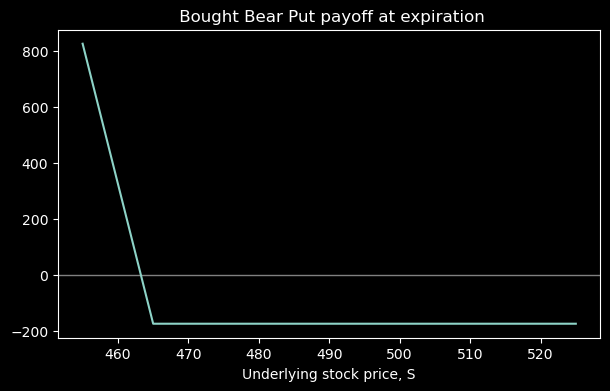

In [11]:
# plot a bull put credit spread
bought_put_payoff = put_payoff(S_, lower_strike_put_K)*100
plt.figure(3, figsize=(7, 4))
plt.title(" Bought Bear Put payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, -lower_strike_put_premium*100 + bought_put_payoff)

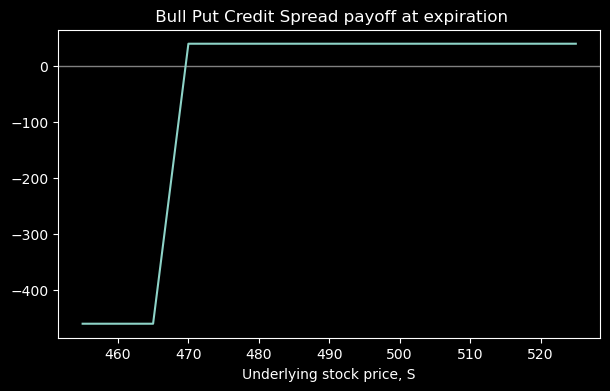

In [12]:
# plot a bull put credit spread
bull_put_credit_spread_payoff = (-put_payoff(S_, put_K) + put_payoff(S_, lower_strike_put_K))*100

plt.figure(3, figsize=(7, 4))
plt.title(" Bull Put Credit Spread payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, net_put_premium_received + bull_put_credit_spread_payoff)

## Bear Call Credit Spread

In [13]:
print("Bear Call Credit Spread")
print(f"Stock price ${S:.2f}")
print(f"Sold ${call_K:.2f} call for ${call_premium:.2f}")
print(f"Bought ${higher_strike_call_K:.2f} call for ${higher_strike_call_premium:.2f}")
net_call_premium_received = (call_premium - higher_strike_call_premium)*100
print(f"Net premium received is {net_call_premium_received:.2f}")
call_strike_range = higher_strike_call_K - call_K
call_maximum_risk = call_strike_range * 100 - net_call_premium_received
print(f"Maximum risk is ${call_maximum_risk:.2f}")
call_return_on_capital_at_risk = (net_call_premium_received / call_maximum_risk)*100
print(f"Maximum return on capital is {net_call_premium_received:.2f} for a return of {call_return_on_capital_at_risk:.0f}%")

Bear Call Credit Spread
Stock price $491.00
Sold $510.00 call for $1.51
Bought $515.00 call for $0.82
Net premium received is 69.00
Maximum risk is $431.00
Maximum return on capital is 69.00 for a return of 16%


In [14]:
call_payoff(S_, call_K)

array([ 0.  ,  0.  ,  0.  , ..., 14.97, 14.98, 14.99])

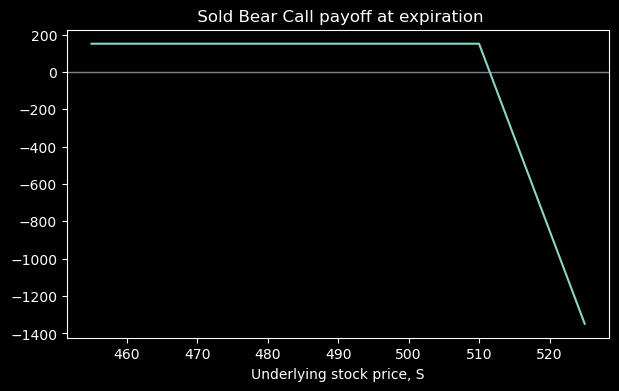

In [15]:
# plot a bear call credit
sold_call_payoff = -call_payoff(S_, call_K)*100
plt.figure(3, figsize=(7, 4))
plt.title(" Sold Bear Call payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, call_premium * 100 + sold_call_payoff)

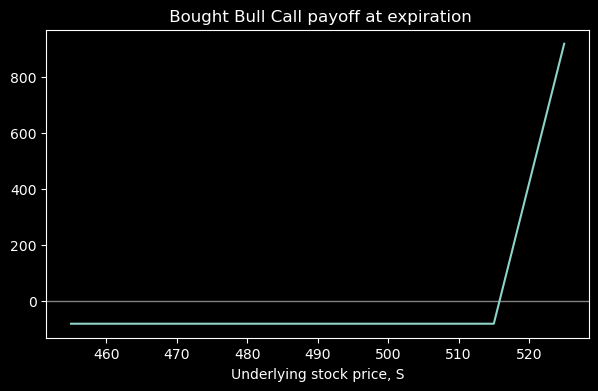

In [16]:
# plot a bull call debit
bought_call_payoff = call_payoff(S_, higher_strike_call_K)*100
plt.figure(3, figsize=(7, 4))
plt.title(" Bought Bull Call payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, -higher_strike_call_premium*100 + bought_call_payoff)

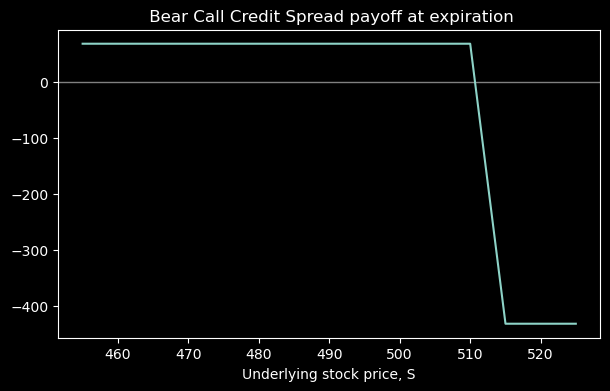

In [17]:
# plot a bear call credit spread
bear_call_credit_spread_payoff = (-call_payoff(S_, call_K) + call_payoff(S_, higher_strike_call_K))*100

plt.figure(3, figsize=(7, 4))
plt.title(" Bear Call Credit Spread payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, net_call_premium_received + bear_call_credit_spread_payoff)

## Iron Condor

In [18]:
print("Iron Condor")
print(f"Stock price ${S:.2f}")
print(f"Sold ${put_K:.2f} put for ${put_premium:.2f}")
print(f"Bought ${lower_strike_put_K:.2f} put for ${lower_strike_put_premium:.2f}")
net_put_premium_received = (put_premium - lower_strike_put_premium)*100
print(f"Net put premium received is {net_put_premium_received:.2f}")
print(f"Sold ${call_K:.2f} call for ${call_premium:.2f}")
print(f"Bought ${higher_strike_call_K:.2f} call for ${higher_strike_call_premium:.2f}")
net_call_premium_received = (call_premium - higher_strike_call_premium)*100
print(f"Net call premium received is {net_call_premium_received:.2f}")
net_premium_received = net_put_premium_received+net_call_premium_received
print(f"Net premium received is {net_premium_received:.2f}")
put_strike_range = put_K - lower_strike_put_K
# put_maximum_risk = (put_strike_range - (put_premium - lower_strike_put_premium)) * 100
maximum_risk = put_strike_range * 100 - net_premium_received
print(f"Maximum risk is ${maximum_risk:.2f}")
return_on_capital_at_risk = (net_premium_received / maximum_risk)*100
print(f"Maximum return on capital is {net_premium_received:.2f} for a return of {return_on_capital_at_risk:.0f}%")
print(f"Lower breakeven is {(put_K - net_premium_received/100):.2f}")
print(f"Upper breakeven is {(call_K + net_premium_received/100):.2f}")

Iron Condor
Stock price $491.00
Sold $470.00 put for $2.14
Bought $465.00 put for $1.74
Net put premium received is 40.00
Sold $510.00 call for $1.51
Bought $515.00 call for $0.82
Net call premium received is 69.00
Net premium received is 109.00
Maximum risk is $391.00
Maximum return on capital is 109.00 for a return of 28%
Lower breakeven is 468.91
Upper breakeven is 511.09


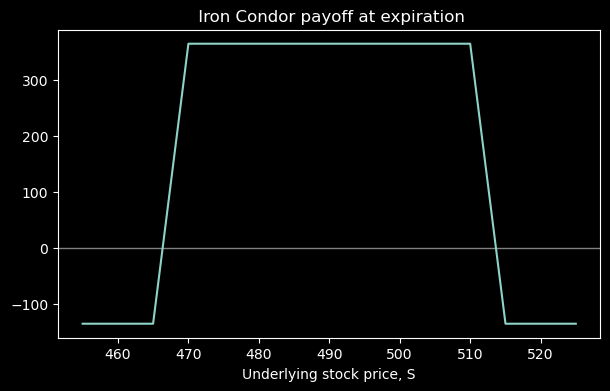

In [19]:
# plot the iron condor
sold_call_payoff = (-put_payoff(S_, put_K) + put_payoff(S_, lower_strike_put_K) - call_payoff(S_, call_K) + call_payoff(S_, higher_strike_call_K))*100
plt.figure(3, figsize=(7, 4))
plt.title(" Iron Condor payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, (call_premium + put_premium) * 100 + sold_call_payoff)

In [20]:
def N(z):
    """ Normal cumulative density function

    :param z: point at which cumulative density is calculated 
    :return: cumulative density under normal curve
    """
    return norm.cdf(z)


def black_scholes_call_value(S, K, r, t, vol):
    """ Black-Scholes call option

    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: BS call option value
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))

    return N(d1) * S - N(d2) * K * np.exp(-r * t)


def black_scholes_put_value(S, K, r, t, vol):
    """ Black-Scholes put option

    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: BS put option value
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))

    return N(-d2) * K * np.exp(-r * t) - N(-d1) * S

In [21]:
call_value = black_scholes_call_value(S, call_K, r, t, vol)
put_value = black_scholes_put_value(S, put_K, r, t, vol)

print(f"Black-Scholes call value {call_value:.2f}")
print(f"Black-Scholes put value {put_value:.2f}")

Black-Scholes call value 7.01
Black-Scholes put value 5.50


In [22]:
# get the value of the option with six months to expiration
black_scholes_call_value_t = (
    black_scholes_call_value(S_, call_K, r, t, vol) - call_premium
)

# get the value of the option with three months to expiration
black_scholes_call_value_half_t = (
    black_scholes_call_value(S_, call_K, r, t/2, vol) - call_premium
)

# get the value of the option with one month to expiration
black_scholes_call_value_quarter_t = (
    black_scholes_call_value(S_, call_K, r, t/4, vol) - call_premium
)

# get payoff value at expiration
call_payoff_at_expiration = call_payoff(S_, call_K) - call_premium

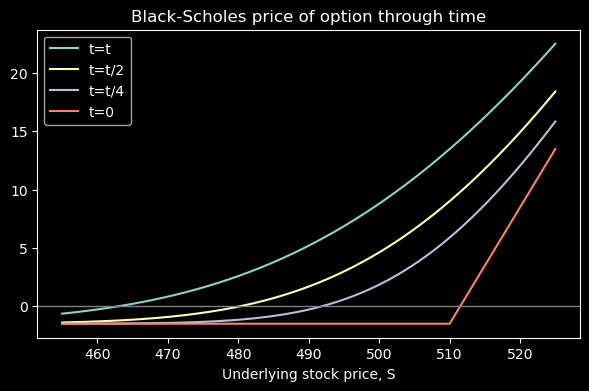

In [23]:
# plot the call payoffs
plt.figure(3, figsize=(7, 4))
plt.plot(S_, black_scholes_call_value_t)
plt.plot(S_, black_scholes_call_value_half_t)
plt.plot(S_, black_scholes_call_value_quarter_t)
plt.plot(S_, call_payoff_at_expiration)
plt.axhline(y=0, lw=1, c="grey")
plt.title("Black-Scholes price of option through time")
plt.xlabel("Underlying stock price, S")
plt.legend(["t=t", "t=t/2", "t=t/4", "t=0"], loc=2)

In [26]:
# helper function phi
def phi(x):
    """ Phi helper function
    
    """
    return np.exp(-0.5 * x * x) / (sqrt(2.0 * pi))


# shared
def gamma(S, K, r, t, vol):
    """ Black-Scholes gamma
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: gamma
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)

    return phi(d1) / (S * vol * sqrt(t))


def vega(S, K, r, t, vol):
    """ Black-Scholes vega
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: vega
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)

    return (S * phi(d1) * sqrt(t)) / 100.0


# call options
def call_delta(S, K, r, t, vol):
    """ Black-Scholes call delta
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: call delta
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)

    return N(d1)

def call_theta(S, K, r, t, vol):
    """ Black-Scholes call theta
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: call theta
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))

    theta = -((S * phi(d1) * vol) / (2.0 * np.sqrt(t))) - (
        r * K * np.exp(-r * t) * N(d2)
    )
    return theta / 365.0


def call_rho(S, K, r, t, vol):
    """ Black-Scholes call rho
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: call rho
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))

    rho = K * t * np.exp(-r * t) * N(d2)
    return rho / 100.0

# put options
def put_delta(S, K, r, t, vol):
    """ Black-Scholes put delta
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: put delta
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)

    return N(d1) - 1.0

def put_theta(S, K, r, t, vol):
    """ Black-Scholes put theta
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: put theta
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))

    theta = -((S * phi(d1) * vol) / (2.0 * np.sqrt(t))) + (
        r * K * np.exp(-r * t) * N(-d2)
    )
    return theta / 365.0

def put_rho(S, K, r, t, vol):
    """ Black-Scholes put rho
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: put rho
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))

    rho = -K * t * np.exp(-r * t) * N(-d2)
    return rho / 100.0

In [27]:
# print each of the results
print("Black-Scholes call delta %0.4f" % call_delta(S, call_K, r, t, vol))
print("Black-Scholes call gamma %0.4f" % gamma(S, call_K, r, t, vol))
print("Black-Scholes call vega %0.4f" % vega(S, call_K, r, t, vol))
print("Black-Scholes call theta %0.4f" % call_theta(S, call_K, r, t, vol))
print("Black-Scholes call rho %0.4f" % call_rho(S, call_K, r, t, vol))
print("Black-Scholes put delta %0.4f" % put_delta(S, put_K, r, t, vol))
print("Black-Scholes put gamma %0.4f" % gamma(S, put_K, r, t, vol))
print("Black-Scholes put vega %0.4f" % vega(S, put_K, r, t, vol))
print("Black-Scholes put theta %0.4f" % put_theta(S, put_K, r, t, vol))
print("Black-Scholes put rho %0.4f" % put_rho(S, put_K, r, t, vol))

Black-Scholes call delta 0.3188
Black-Scholes call gamma 0.0101
Black-Scholes call vega 0.5026
Black-Scholes call theta -0.2176
Black-Scholes call rho 0.1229
Black-Scholes put delta -0.2519
Black-Scholes put gamma 0.0091
Black-Scholes put vega 0.4491
Black-Scholes put theta -0.1800
Black-Scholes put rho -0.1062


Realised Volatility

In [29]:
# define a stock symbol
underlying_symbol = "AAPL"
obb.equity.price.historical(underlying_symbol)

# get data
prices = obb.stocks.load(underlying_symbol, start_date="2022-01-01", end_date="2024-02-17")
# yahoo returns prices in ascending order, sort to descending order
prices.sort_index(ascending=False, inplace=True)

# let's pickle the dataframe so we don't have to hit the network every time
prices.to_pickle("underlying_prices.pickle")

ImportError: cannot import name 'check_single_item' from 'openbb_core.app.utils' (/home/ubuntuuser/miniconda3/envs/securities_analysis/lib/python3.11/site-packages/openbb_core/app/utils.py)